In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


**Things I need to test out:**
* Is it better to predict just the actual fare amount (total - tip - congestion .... ) or the total amount itself?
* Is store_fwd_flag even useful?

In [2]:
sample = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv")
sample

,ID,total_amount
0,1,24.456348
1,2,24.374058
2,3,19.878154
3,4,25.015569
4,5,22.252489
...,...,...
995,996,24.438531
996,997,26.773706
997,998,22.192718
998,999,142.698686


In [3]:
test = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")
test

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,2023-06-29 17:41:59,2023-06-29 18:30:36,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,0.0,1.0,2.5,0.00
49996,1,2023-06-30 01:25:25,2023-06-30 01:10:40,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,0.0,1.0,0.0,1.75
49997,1,2023-06-30 22:28:44,2023-06-30 21:49:37,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,0.0,1.0,2.5,0.00
49998,0,2023-06-30 02:37:18,2023-06-30 02:10:33,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,0.0,1.0,2.5,0.00


In [4]:
data = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

# Preprocessing

##### Things to improve preprocessing
* Different categorization of hours
* Discounted fares
* MinMaxScaler
* PCA
* KNNImputer CV k=8
* 

In [6]:
target = data['total_amount']
features = data.drop(columns=['total_amount'])

In [7]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder, OneHotEncoder, MinMaxScaler

# Converts the data
def converter(data):
    data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
    data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
    data['pickup_dayofweek'] = data['tpep_pickup_datetime'].dt.dayofweek
    data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
    data['dropoff_hour'] = data['tpep_dropoff_datetime'].dt.hour
    data['dropoff_month'] = data['tpep_dropoff_datetime'].dt.month
    data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).abs().dt.total_seconds()
    pu_frequency = data['PULocationID'].value_counts() / len(data)
    do_frequency = data['DOLocationID'].value_counts() / len(data)
    data['PULocationID'] = data['PULocationID'].map(pu_frequency)
    data['DOLocationID'] = data['DOLocationID'].map(do_frequency)
    return data

converter_transformer = FunctionTransformer(converter)

# Makes a new column called "tip_cluster" based on estimates derived from the Elbow Method
class TipClusterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=2, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)

    def fit(self, X, y=None):
        self.kmeans.fit(X[['tip_amount']])
        return self

    def transform(self, X, y=None):
        X = X.copy()
        X['tip_cluster'] = self.kmeans.predict(X[['tip_amount']])
        return X

# Makes a new column called "time_cluster" based on estimates derived from the Elbow Method
class TimeClusterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=2, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)

    def fit(self, X, y=None):
        self.kmeans.fit(X[['trip_duration']])
        return self

    def transform(self, X, y=None):
        X = X.copy()
        X['time_cluster'] = self.kmeans.predict(X[['trip_duration']])
        return X

preprocessor = ColumnTransformer(
    transformers=[
        ('imputer_encoder', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ordinal_encoder', OrdinalEncoder())
        ]), ['store_and_fwd_flag']),
        ('onehot', OneHotEncoder(sparse=False), ['payment_type']),
        ('drop_tpep_pickup_datetime', 'drop', ['tpep_pickup_datetime']),
        ('drop_tpep_dropoff_datetime', 'drop', ['tpep_dropoff_datetime']),
        ('drop_PULocationID', 'drop', ['PULocationID']),
        ('drop_DOLocationID', 'drop', ['DOLocationID'])
    ],
    remainder='passthrough'
)


# Full Pipeline for the Main Preprocessing (RandomForestRegressor)
full_pipeline = Pipeline([
    ('converter', converter_transformer),
    ('tip_cluster', TipClusterTransformer(n_clusters=2, random_state=42)),
    ('time_cluster', TimeClusterTransformer(n_clusters=2, random_state=42)),
    ('preprocessor', preprocessor),
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', MinMaxScaler())
])

In [8]:
transformed_features = full_pipeline.fit_transform(features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(transformed_features, target, test_size=0.2, random_state=42)
X_train.shape

(140000, 23)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
r2_train = model.score(X_train, y_train)

r2_test = model.score(X_test, y_test)

print(f"R^2 on training set: {r2_train}")
print(f"R^2 on test set: {r2_test}")

R^2 on training set: 0.7354880722067716
R^2 on test set: 0.730049175183312


### With Time and Tip Cluster 
* R^2 on training set: 0.7354880722067716
* R^2 on test set: 0.730049175183312

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf_regressor_1 = RandomForestRegressor(random_state=42, n_estimators = 400)

#cv_scores = cross_val_score(rf_regressor_1, transformed_features, target, cv=5, scoring='r2')
rf_regressor_1.fit(transformed_features, target)

RandomForestRegressor(n_estimators=400, random_state=42)

In [14]:
r2_train = rf_regressor_1.score(X_train, y_train)

r2_test = rf_regressor_1.score(X_test, y_test)

print(f"R^2 on training set: {r2_train}")
print(f"R^2 on test set: {r2_test}")

R^2 on training set: 0.9919019294874483
R^2 on test set: 0.9949019775380824


* R^2 on training set: 0.9920516629643522
* R^2 on test set: 0.9616157379799184

In [15]:
#rf_regressor_1.fit(transformed_features, target)

In [16]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

regressor = HistGradientBoostingRegressor(
    random_state=42,
    learning_rate=0.1105358046457723,
    max_iter=665,
    max_leaf_nodes=42,
    min_samples_leaf=24
)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R-squared (R2): {r2}")

/opt/conda/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


R-squared (R2): 0.9420407626012233


### Preprocessing Broken Down

In [17]:
combined_data = data.copy()
combined_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00


In [18]:
combined_data['tpep_pickup_datetime'] = pd.to_datetime(combined_data['tpep_pickup_datetime'])
combined_data['tpep_dropoff_datetime'] = pd.to_datetime(combined_data['tpep_dropoff_datetime'])
combined_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00


In [19]:
combined_data['pickup_dayofweek'] = combined_data['tpep_pickup_datetime'].dt.dayofweek

combined_data['pickup_hour'] = combined_data['tpep_pickup_datetime'].dt.hour

combined_data['dropoff_hour'] = combined_data['tpep_dropoff_datetime'].dt.hour

combined_data['dropoff_month'] = combined_data['tpep_dropoff_datetime'].dt.month

combined_data['trip_duration'] = (combined_data['tpep_dropoff_datetime'] - combined_data['tpep_pickup_datetime']).abs().dt.total_seconds()

In [20]:
combined_data.shape

(175000, 22)

## Categorizing Hour

* #### Option 1:
Manually deciding

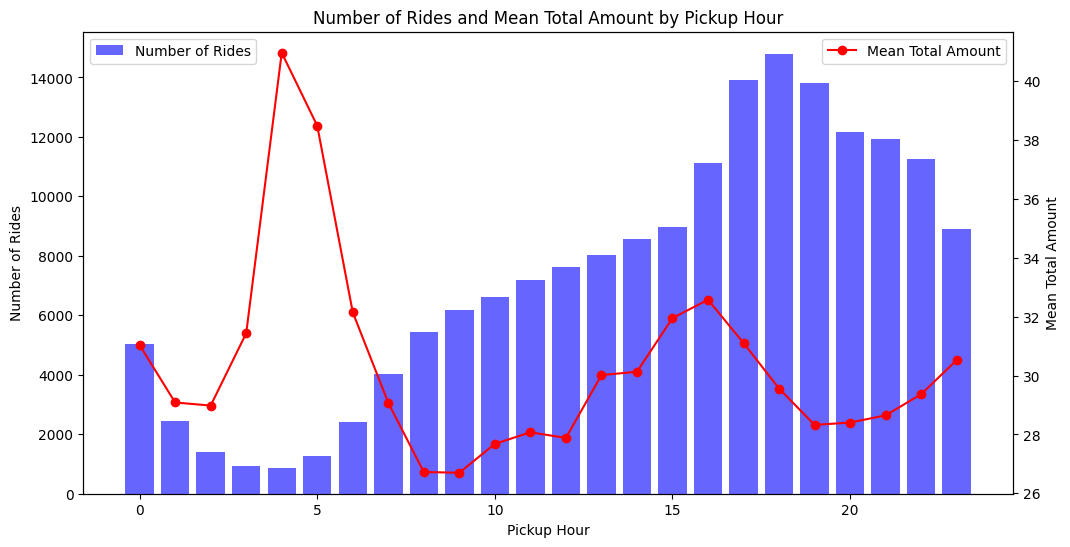

In [21]:
import matplotlib.pyplot as plt

# This finds the mean total_amount by hour
mean_amount_by_hour = combined_data.groupby('pickup_hour')['total_amount'].mean()

# This finds the number of rides by pickup hour
pickup_hour_counts = combined_data.groupby('pickup_hour').size()

#This plots the number of rides by pickup hour
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(pickup_hour_counts.index, pickup_hour_counts, color='b', alpha=0.6, label='Number of Rides')
ax1.set_xlabel('Pickup Hour')
ax1.set_ylabel('Number of Rides')
ax1.tick_params('y')

# This plots the mean total_amount by hour
ax2 = ax1.twinx()
ax2.plot(mean_amount_by_hour.index, mean_amount_by_hour, color='r', marker='o', label='Mean Total Amount')
ax2.set_ylabel('Mean Total Amount')
ax2.tick_params('y')

plt.title('Number of Rides and Mean Total Amount by Pickup Hour')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [22]:
def categorize_hour(hour):
    if 0 <= hour <= 7:
        return 0
    elif 8 <= hour <= 15:
        return 1
    else:
        return 2

* #### Option 2:
KMeans elbow method (2) or (3)

#### Choosing n_clusters
* Using elbow method

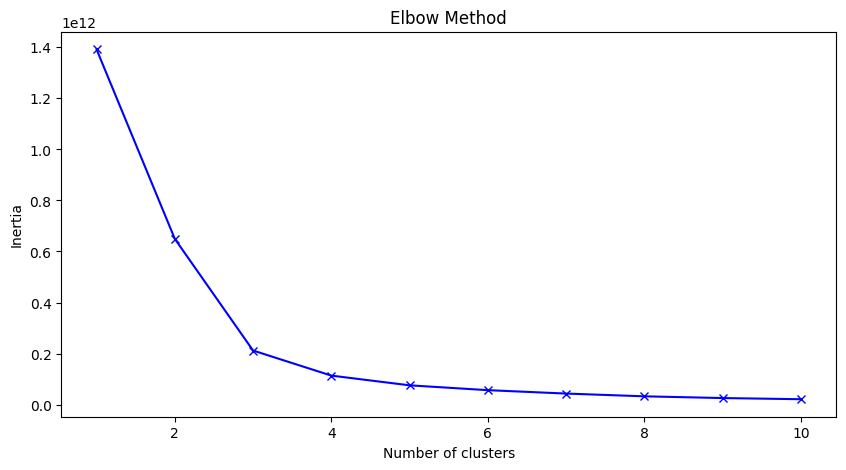

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(combined_data['trip_duration'].values.reshape(-1, 1))
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**We can conclude here that the optimal number of clusters based on the elbow method is 2 or 3.** When applying the elbow method to determine the optimal number of clusters in a dataset, we aim to find a point where the addition of more clusters provides diminishing returns in explaining the variation within the data.

However, choosing between 2 or 3 clusters might require further consideration or domain knowledge. Since this elbow plot doesn't have a clear, decisive bend and instead shows a gradual decline without a distinct elbow, it could indicate a more subjective decision in determining the number of clusters.

In [24]:
# We have to figure out whether picking KMeans for n_clusters = 2 or n_clusters = 3 works better

# Here, I am performing the case of picking n_clusters = 2

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(combined_data['trip_duration'].values.reshape(-1, 1))

combined_data['time_cluster'] = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
# Here, I am performing the case of picking n_clusters = 3

from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters=3, random_state=42)

kmeans_3.fit(combined_data['trip_duration'].values.reshape(-1, 1))

combined_data['time_cluster_1'] = kmeans_3.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


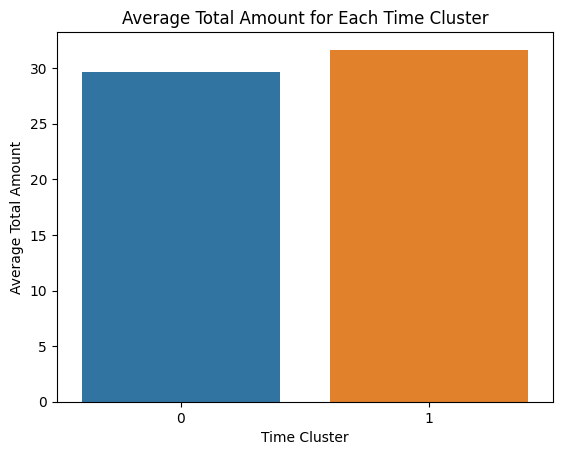

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

average_amount_per_cluster = combined_data.groupby('time_cluster')['total_amount'].mean()

sns.barplot(x=average_amount_per_cluster.index, y=average_amount_per_cluster.values)
plt.title('Average Total Amount for Each Time Cluster')
plt.xlabel('Time Cluster')
plt.ylabel('Average Total Amount')
plt.xticks(range(len(average_amount_per_cluster)))
plt.show()

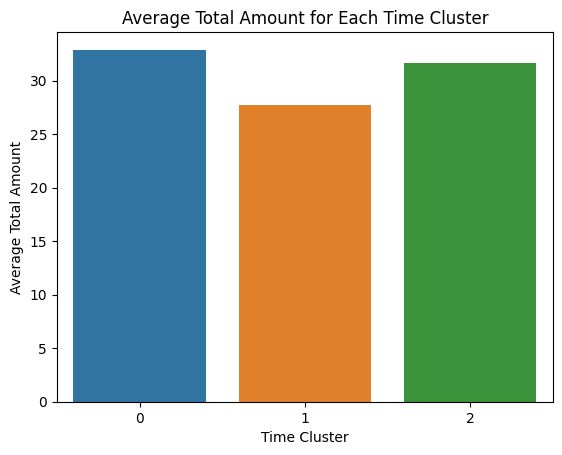

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

average_amount_per_cluster = combined_data.groupby('time_cluster_1')['total_amount'].mean()

sns.barplot(x=average_amount_per_cluster.index, y=average_amount_per_cluster.values)
plt.title('Average Total Amount for Each Time Cluster')
plt.xlabel('Time Cluster')
plt.ylabel('Average Total Amount')
plt.xticks(range(len(average_amount_per_cluster)))
plt.show()

#### Choosing n_clusters for Tip Amount
* Using elbow method

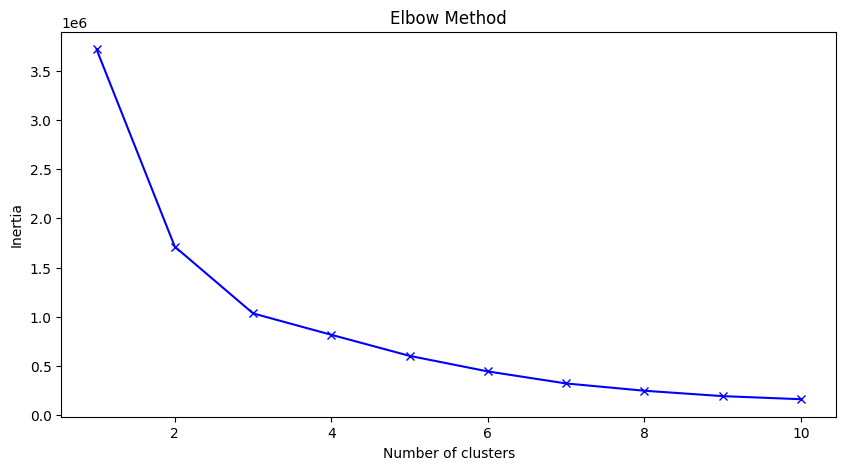

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(combined_data['tip_amount'].values.reshape(-1, 1))
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [29]:
# We have to figure out whether picking KMeans for n_clusters = 2 or n_clusters = 3 works better

# Here, I am performing the case of picking n_clusters = 2

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(combined_data['tip_amount'].values.reshape(-1, 1))

combined_data['tip_cluster'] = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Categorizing PULocationID and DOLocationID

* #### Option 1:
Frequency encoding

In [30]:
pu_frequency = combined_data['PULocationID'].value_counts() / len(data)
do_frequency = combined_data['DOLocationID'].value_counts() / len(data)

combined_data['PULocationID'] = combined_data['PULocationID'].map(pu_frequency)
combined_data['DOLocationID'] = combined_data['DOLocationID'].map(do_frequency)

In [31]:
combined_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,Airport_fee,pickup_dayofweek,pickup_hour,dropoff_hour,dropoff_month,trip_duration,time_cluster,time_cluster_1,tip_cluster
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,0.003726,0.003491,Credit Card,...,2.5,0.00,2,17,16,6,2736.0,0,1,0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,0.003771,0.003743,Credit Card,...,2.5,0.00,3,23,22,6,3806.0,0,0,0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,0.003783,0.003760,Credit Card,...,2.5,0.00,4,10,11,6,3219.0,0,0,0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,0.003617,0.003766,Credit Card,...,2.5,0.00,3,13,14,6,3412.0,0,0,0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,0.003874,0.003646,Credit Card,...,2.5,0.00,3,22,22,6,1130.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,0.003657,0.004046,Credit Card,...,2.5,0.00,4,22,22,6,1715.0,0,1,0
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,0.003651,0.003754,Cash,...,2.5,1.75,4,13,14,6,3684.0,0,0,0
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,0.003771,0.003834,Credit Card,...,2.5,0.00,3,11,12,6,4202.0,0,0,0
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,0.003800,0.003634,Credit Card,...,2.5,0.00,3,19,19,6,2302.0,0,1,0


## Feature Encoding


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [33]:
new_preprocessor = ColumnTransformer(
    transformers=[
        ('imputer_encoder', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ordinal_encoder', OrdinalEncoder())
        ]), ['store_and_fwd_flag']),
        ('onehot', OneHotEncoder(sparse=False), ['payment_type'])
    ],
    remainder='passthrough'
)

In [34]:
processed_data = new_preprocessor.fit_transform(combined_data)

onehot_columns = new_preprocessor.named_transformers_['onehot'].get_feature_names_out()

transformed_columns = ['store_and_fwd_flag_encoded'] + list(onehot_columns)
remaining_columns = [col for col in combined_data.columns if col not in ['store_and_fwd_flag', 'payment_type']]
all_columns = transformed_columns + remaining_columns

combined_data = pd.DataFrame(processed_data, columns=all_columns)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
combined_data.shape

(175000, 29)

In [36]:
combined_data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime','PULocationID','DOLocationID','total_amount','time_cluster_1'], axis=1, inplace=True)

In [37]:
combined_data.shape

(175000, 23)

## KNNImputer


from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

average_r2_scores = []

for k in range(1, 9):
    pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=k)),
        ('scaler', MinMaxScaler()),
        ('regressor', RandomForestRegressor(random_state=42))
    ])
    scores = cross_val_score(pipeline, combined_data, target, cv=5, scoring='r2')
    average_r2_scores.append(np.mean(scores))

best_r2_score = max(average_r2_scores)
best_k = average_r2_scores.index(best_r2_score) + 1

print(f"The best R^2 score is {best_r2_score} for k = {best_k}")

**The best R^2 on the training data occurs when n_neigbours is 6.**

A n_neighbors value of 6 implies that, for missing value imputation, considering the six nearest neighbors provided the best balance between local information and generalization. It seems that imputing missing values by considering six closest data points helps the model better estimate the missing values.

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
combined_data

,store_and_fwd_flag_encoded,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown,VendorID,passenger_count,trip_distance,RatecodeID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,pickup_dayofweek,pickup_hour,dropoff_hour,dropoff_month,trip_duration,time_cluster,tip_cluster
0,0.0,0.0,1.0,0.0,0.0,0.0,1,1.0,2.14,1.0,2.5,7.165589,0.0,1.0,2.5,0.0,2,17,16,6,2736.0,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0,2.7,1.0,3.5,6.067401,0.0,1.0,2.5,0.0,3,23,22,6,3806.0,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,1,1.0,1.15,1.0,0.0,4.111547,0.0,1.0,2.5,0.0,4,10,11,6,3219.0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0,0.4,1.0,2.5,6.411079,0.0,1.0,2.5,0.0,3,13,14,6,3412.0,0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1,3.0,1.1,1.0,1.0,4.769377,0.0,1.0,2.5,0.0,3,22,22,6,1130.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,0.0,0.0,1.0,0.0,0.0,0.0,1,3.0,3.45,1.0,1.0,8.732495,0.0,1.0,2.5,0.0,4,22,22,6,1715.0,0,0
174996,0.0,1.0,0.0,0.0,0.0,0.0,1,1.0,9.44,1.0,5.0,0.283275,0.0,1.0,2.5,1.75,4,13,14,6,3684.0,0,0
174997,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0,2.4,1.0,2.5,4.245354,0.0,1.0,2.5,0.0,3,11,12,6,4202.0,0,0
174998,0.0,0.0,1.0,0.0,0.0,0.0,1,1.0,4.71,1.0,2.5,10.479776,0.0,1.0,2.5,0.0,3,19,19,6,2302.0,0,0


In [40]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=6)

imputed_data = imputer.fit_transform(combined_data)

combined_data = pd.DataFrame(imputed_data, columns=combined_data.columns)

## Scaling

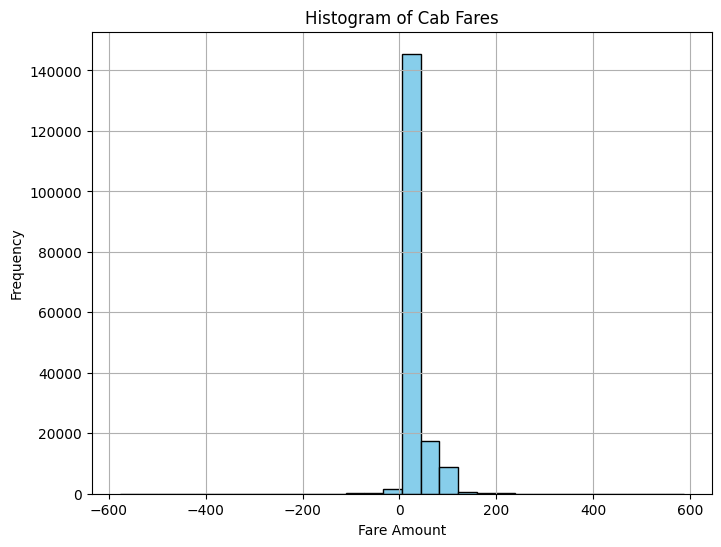

In [41]:
import matplotlib.pyplot as plt

fare_data = data['total_amount']

plt.figure(figsize=(8, 6))
plt.hist(fare_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Cab Fares')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [42]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

sampled_data = target.sample(1000, random_state=42)

stat, p_value_shapiro = stats.shapiro(sampled_data)
print("Shapiro-Wilk Test")
print("Statistic:", stat, "P-value:", p_value_shapiro)

Shapiro-Wilk Test
Statistic: 0.7024597525596619 P-value: 9.906790581803374e-39


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_data)

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(combined_data)

I finally **opted to use MinMaxScaler** as it scales features to a specific range, between 0 and 1, preserving the relative distances between data points. This scaling might be more intuitive or interpretable in a dataset that contains multiple categorical datapoints compared to the mean-centered and variance-scaled features by StandardScaler.

## Model

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [46]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
X_train.shape

(140000, 23)

## Model 1 - A Linear Regression Model

In [47]:
new_model = LinearRegression()
new_model.fit(X_train, y_train)

LinearRegression()

**Using just the basic Linear Regression Model, we check the R^2 for different ways of preprocessing to check how it works**

### Using manual categorisation (morning - afternoon - night)
* R^2 on training set: 0.7276043152731864
* R^2 on test set: 0.7243290660562227

### Using K-means elbow method (n_means = 3)
* R^2 on training set: 0.7275216035994128
* R^2 on test set: 0.7241809723865218

### Using K-means elbow method (n_means = 2)
* R^2 on training set: 0.7284557898141801
* R^2 on test set: 0.7252344782187111

### Adding Dummy Variable (does not change error)
* R^2 on training set: 0.7284557898141801
* R^2 on test set: 0.7252344782187111

### By Including Frequency Encoding of PULocationID and DOLocationID
* R^2 on training set: 0.7285059350475068
* R^2 on test set: 0.7253179835640304

### By Making a Distance Category
* R^2 on training set: 0.728491584235275
* R^2 on test set: 0.7252734021414668

### By Making a Distance Category
* R^2 on training set: 0.728491584235275
* R^2 on test set: 0.7252734021414668

### With Time and Tip Cluster with KNNImputer n_neighbors = 5
* R^2 on training set: 0.7354880722067716
* R^2 on test set: 0.730049175183312

### With Time and Tip Cluster with KNNImputer n_neighbors = 6
* R^2 on training set: 0.7355012560341144
* R^2 on test set: 0.7299435714526279

In [48]:
r2_train = new_model.score(X_train, y_train)

r2_test = new_model.score(X_test, y_test)

print(f"R^2 on training set: {r2_train}")
print(f"R^2 on test set: {r2_test}")

R^2 on training set: 0.7355012560341144
R^2 on test set: 0.7299435714526279


## Different Linear Models and their test R^2

#### Lasso Model
* **Alpha: 0.001**
* R^2 on training set: 0.7284713139200886
* R^2 on test set: 0.7250251061750189


* **Alpha: 0.01**
* R^2 on training set: 0.7248764836478507
* R^2 on test set: 0.7190555330927018


* **Alpha: 0.1**
* R^2 on training set: 0.5822276552207414
* R^2 on test set: 0.567858192960462


* **Alpha: 1**
* R^2 on training set: 0.2885617906691095
* R^2 on test set: 0.28231194947821625


* **Alpha: 10**
* R^2 on training set: 0.0
* R^2 on test set: -3.7584352301278656e-05


#### Ridge
* R^2 on training set: 0.7274397793988513
* R^2 on test set: 0.7221796010935891

#### ElasticNet
* Best parameters: {'l1_ratio': 1.0, 'alpha': 0.0005336699231206312}
* Mean Squared Error: 178.84109394961405
* R-squared: 0.725180401281129


## Model 2 - A RandomForestRegression

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

y_pred = grid_search.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

feature_importances = grid_search.best_estimator_.feature_importances_
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i + 1}: {importance:.2f}")

Here, the best model from the Hyperparameter-tuned Model does not provide the best R^2

##### R-squared (R2): 0.83429130

**GridSearchCV** explores a predefined grid of hyperparameters. In certain scenarios, the complexity of the problem might require a more nuanced exploration of the hyperparameter space, which the predefined grid might not cover comprehensively.

**Manual hyperparameter tuning** can be time-consuming and requires a good understanding of the algorithm and problem domain. However, it can often yield better-tuned models that generalize well to unseen data compared to purely automated hyperparameter optimization techniques, especially when dealing with complex algorithms and datasets.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

new_rf_regressor = RandomForestRegressor(random_state=42, n_estimators = 400)

cv_scores = cross_val_score(rf_regressor_1, scaled_features, target, cv=5, scoring='r2')

print("R² scores for each fold:", cv_scores)
print("Average R²:", np.mean(cv_scores))

### Cross-validated score with n_estimators = 200
* R² scores for each fold: [0.91840647, 0.95079546, 0.95253215, 0.94484538, 0.95143161]
* Average R²: 0.9436022146118045

### Cross-validated score with n_estimators = 300
* R² scores for each fold: [0.91954327, 0.95140803, 0.9526156,  0.94483804, 0.95156656]
* Average R²: 0.9439943013517993

### Cross-validated score with n_estimators = 300, min_samples_leaf = 1
* R² scores for each fold: [0.91954327 0.95140803 0.9526156  0.94483804 0.95156656]
* Average R²: 0.9439943013517993

### Cross-validated score with n_estimators = 300, max_depth = 10
* R² scores for each fold: [0.88437108 0.91660642 0.92423821 0.91064935 0.91877865]
* Average R²: 0.9109287411751816


### Cross-validated score with n_estimators = 400
* R² scores for each fold: [0.91967491 0.95122879 0.95249166 0.94501557 0.95164169]
* Average R²: 0.944010524

**Therefore, picked the best model after hyperparameter tuning as a RandomForestRegressor with parameter n_estimators = 400**

## Model 3 - HistGradientBoostRegressor

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform, randint

param_distributions = {
    'learning_rate': uniform(0.01, 0.2),  # Continuous distribution between 0.01 and 0.21
    'max_iter': randint(100, 1000),        # Discrete distribution between 100 and 1000
    'max_leaf_nodes': randint(20, 50),     # Discrete distribution between 20 and 50
    'min_samples_leaf': randint(20, 50)    # Discrete distribution between 20 and 50
}

hist_gradient_boosting_model = HistGradientBoostingRegressor(random_state=42)

random_search = RandomizedSearchCV(hist_gradient_boosting_model, param_distributions, 
                                   n_iter=100, scoring='r2', 
                                   cv=5, random_state=42, verbose=3)

random_search.fit(X_train, y_train)

In [50]:
test

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,2023-06-29 17:41:59,2023-06-29 18:30:36,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,0.0,1.0,2.5,0.00
49996,1,2023-06-30 01:25:25,2023-06-30 01:10:40,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,0.0,1.0,0.0,1.75
49997,1,2023-06-30 22:28:44,2023-06-30 21:49:37,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,0.0,1.0,2.5,0.00
49998,0,2023-06-30 02:37:18,2023-06-30 02:10:33,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,0.0,1.0,2.5,0.00


In [51]:
transformed_test = full_pipeline.transform(test)

In [52]:
transformed_test

array([[0.        , 0.        , 1.        , ..., 0.00260222, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.00552971, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.04341368, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.02544753, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01740234, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.03251689, 0.        ,
        0.        ]])

In [53]:
pd.set_option('display.max_columns', None)

In [54]:
new_test = pd.DataFrame(transformed_test)
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50000 non-null  float64
 1   1       50000 non-null  float64
 2   2       50000 non-null  float64
 3   3       50000 non-null  float64
 4   4       50000 non-null  float64
 5   5       50000 non-null  float64
 6   6       50000 non-null  float64
 7   7       50000 non-null  float64
 8   8       50000 non-null  float64
 9   9       50000 non-null  float64
 10  10      50000 non-null  float64
 11  11      50000 non-null  float64
 12  12      50000 non-null  float64
 13  13      50000 non-null  float64
 14  14      50000 non-null  float64
 15  15      50000 non-null  float64
 16  16      50000 non-null  float64
 17  17      50000 non-null  float64
 18  18      50000 non-null  float64
 19  19      50000 non-null  float64
 20  20      50000 non-null  float64
 21  21      50000 non-null  float64
 22

In [55]:
y_pred = rf_regressor_1.predict(transformed_test)

In [56]:
submission = pd.DataFrame(columns = ["ID","total_amount"])
submission["ID"] = [i for i in range(1,50001)]
submission["total_amount"] = y_pred

In [57]:
submission

,ID,total_amount
0,1,36.344700
1,2,24.569825
2,3,15.527950
3,4,15.044625
4,5,22.296825
...,...,...
49995,49996,14.838100
49996,49997,26.651775
49997,49998,22.459950
49998,49999,35.613725


In [58]:
submission.to_csv("submission.csv",index = False)

# Things to try Out

### Creating a column called fare_without_extra (total_amount - surcharges)

In [59]:
data['fare_wthout_extra'] = data['total_amount'] - (data['tolls_amount'] + data['improvement_surcharge'] + data['congestion_surcharge'] + data['Airport_fee'])
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,fare_wthout_extra
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00,17.14
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00,22.05
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00,14.14
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00,9.30
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00,14.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00,24.58
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75,54.70
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00,30.00
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00,37.30


### Focus on negative fares

In [60]:
negative_totalfare = data[data['total_amount'] < 0]
negative_totalfare['total_amount']

91       -87.30
166      -22.80
228      -18.50
316       -9.70
370       -7.00
          ...  
174504   -15.00
174578   -80.55
174784   -74.00
174921   -10.20
174992   -10.10
Name: total_amount, Length: 1725, dtype: float64

In [61]:
negative_fare = data[data['fare_wthout_extra'] < 0]
negative_fare['fare_wthout_extra']

91       -75.5
166      -19.3
228      -15.0
316       -8.7
370       -3.5
          ... 
174504   -11.5
174578   -70.5
174784   -70.5
174921    -6.7
174992    -6.6
Name: fare_wthout_extra, Length: 1725, dtype: float64